<a href="https://colab.research.google.com/github/ky691024/colab_0703_AI/blob/main/cnn_20230807_KY_2115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import cifar10
# ((nparray:x_train, nparray:y_train), (nparray:x_test, nparray:y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [4]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

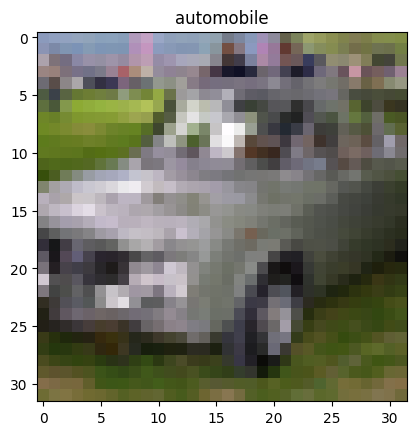

In [5]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
idx = 44
plt.title("{}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

l = [
    # 1個filter(3 * 3 * 3) * 64(種過濾方式 + 64(bias)
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種過濾方式) + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 128) * 256(種過濾方式) + 256(bias) = 295168
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 256) * 512(種過濾方式) + 512(bias) = 1180160
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D

l = [
    # 1個filter(3 * 3 * 3) * 64(種過濾方式 + 64(bias)
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種過濾方式) + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 128) * 256(種過濾方式) + 256(bias) = 295168
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 256) * 512(種過濾方式) + 512(bias) = 1180160
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)       

In [8]:
# 如果你使用sparse版本妳就不用自己做y的one-hot(節省ram)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [9]:
# 0 to 1 range
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=100,
     validation_split=0.1,
     callbacks=c)

Epoch 1/100
225/225 [==============================] - 17s 21ms/step - loss: 1.6933 - accuracy: 0.3742 - val_loss: 1.3423 - val_accuracy: 0.5128
Epoch 2/100
225/225 [==============================] - 4s 19ms/step - loss: 1.2352 - accuracy: 0.5530 - val_loss: 1.1340 - val_accuracy: 0.6078
Epoch 3/100
225/225 [==============================] - 4s 19ms/step - loss: 1.0295 - accuracy: 0.6367 - val_loss: 0.9844 - val_accuracy: 0.6482
Epoch 4/100
225/225 [==============================] - 4s 19ms/step - loss: 0.8832 - accuracy: 0.6888 - val_loss: 0.8897 - val_accuracy: 0.6898
Epoch 5/100
225/225 [==============================] - 4s 20ms/step - loss: 0.7925 - accuracy: 0.7227 - val_loss: 0.7915 - val_accuracy: 0.7260
Epoch 6/100
225/225 [==============================] - 4s 20ms/step - loss: 0.7027 - accuracy: 0.7534 - val_loss: 0.7178 - val_accuracy: 0.7504
Epoch 7/100
225/225 [==============================] - 4s 19ms/step - loss: 0.6193 - accuracy: 0.7838 - val_loss: 0.7157 - val_accuracy

In [11]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6982 - accuracy: 0.7587


[0.6981817483901978, 0.7587000131607056]

In [12]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
pd.DataFrame(confusion_matrix(y_test, pre),
       columns=["{}(pre)".format(trans[i]) for i in range(10)],
       index=["{}(true)".format(trans[i]) for i in range(10)])

313/313 [==============================] - 1s 2ms/step


,airplane(pre),automobile(pre),bird(pre),cat(pre),deer(pre),dog(pre),frog(pre),horse(pre),ship(pre),truck(pre)
airplane(true),805,13,46,11,9,3,14,19,48,32
automobile(true),12,853,4,11,0,2,9,2,21,86
bird(true),53,1,638,68,65,39,87,35,9,5
cat(true),15,4,62,640,38,90,88,36,14,13
deer(true),11,1,66,72,647,17,78,91,15,2
dog(true),13,2,36,253,30,565,29,54,9,9
frog(true),3,2,30,49,14,9,877,4,8,4
horse(true),8,1,28,42,31,33,7,838,2,10
ship(true),49,22,11,16,4,3,6,2,864,23
truck(true),26,42,10,14,1,4,11,15,17,860


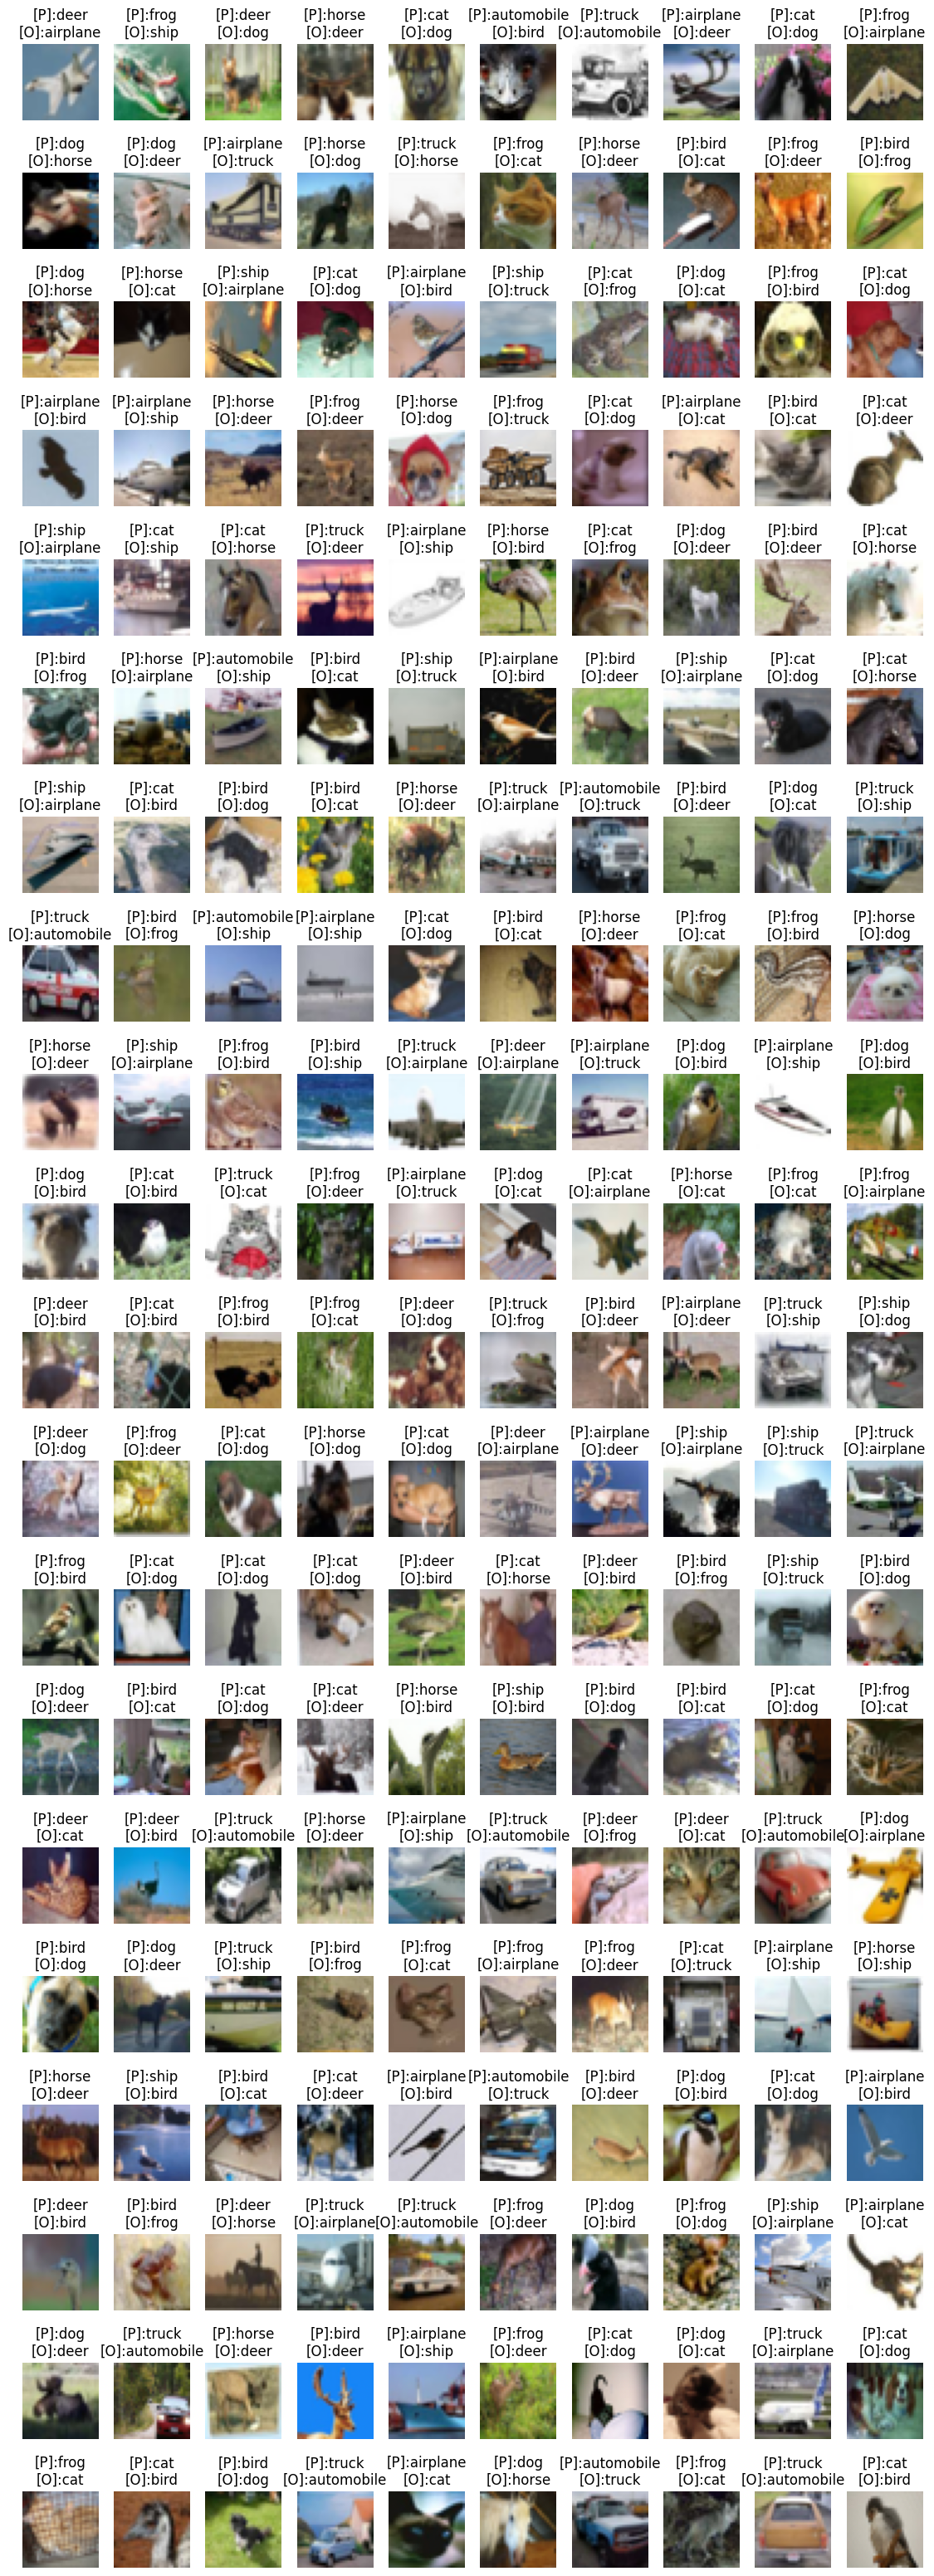

In [13]:
import numpy as np
# !!!
idx = np.nonzero(pre != y_test)[0][:200]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
width = 10
height= len(idx) // 10 + 1
plt.figure(figsize=(14, 42))
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(trans[false_pre[i]],
                   trans[false_true[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

1/1 [==============================] - 0s 18ms/step
airplane 的機率是: 0.152
automobile 的機率是: 0.0
bird 的機率是: 0.0014
cat 的機率是: 0.3284
deer 的機率是: 0.4986
dog 的機率是: 0.0161
frog 的機率是: 0.0022
horse 的機率是: 0.0012
ship 的機率是: 0.0
truck 的機率是: 0.0


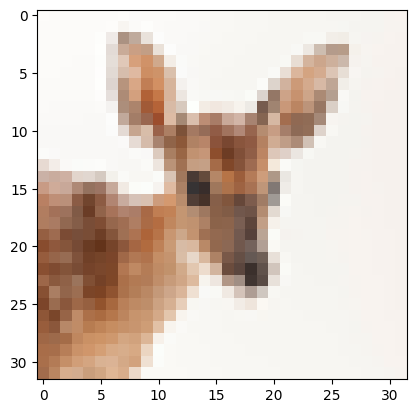

In [15]:
import requests
from PIL import Image
url = "https://i.natgeofe.com/n/05ecc07c-c0e3-4d94-9e32-93ba1e9110ed/white-tailed-deer_thumb_4x3.JPG" # @param {type:"string"}
response = requests.get(url, stream=True)
img = Image.open(response.raw)
img_r = img.resize((32, 32)).convert("RGB")
img_np = np.array(img_r).reshape(1, 32, 32, 3) / 255.0
probs = model.predict(img_np)[0]
for t, p in zip(trans, probs):
    print(t, "的機率是:", round(p, 4))
plt.imshow(img_r)

In [ ]:
# HDFView: https://www.hdfgroup.org/downloads/hdfview/
import os
from tensorflow.keras.models import load_model
model.save("xxx.h5")
if os.path.exists("cnn.h5"):
    model = load_model("cnn.h5")
    # 不需要再compile, 你可以再繼續predict/fit
else:
    # 走上面那個Sequential創全部
    pass